In [77]:
import pandas as pd

In [78]:
train_df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Fake News Classifier Using LSTM/train.csv")

In [79]:
train_df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [80]:
#Dropping Nan Values
train_df = train_df.dropna()

In [81]:
#Splitting the Data into X and y
#X is out independent Features and y is our dependent feature

X = train_df.drop(['label'],axis=1)
y = train_df['label']

In [82]:
X.head()

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...


In [83]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: label, dtype: int64

In [84]:
#Importing Libraries that are needed for LSTM
import tensorflow as tf
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense

In [85]:
#Vocabulary size
voc_size = 10000

In [86]:
messages = X.copy()                    
messages.reset_index(inplace=True)    #Because I Drop Nan Values from X

In [87]:
#Data Pre-processing

import nltk
nltk.download('stopwords')
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

ps = PorterStemmer()
sw = set(stopwords.words("english"))
corpus = []


for i in range(0,len(messages)):
  sentence = re.sub('[^a-zA-Z]+',' ',messages['title'][i])
  sentence = sentence.lower()
  
  sentence = sentence.split()
  sentence = [ps.stem(word) for word in sentence if word not in sw]
  sentence = " ".join(sentence)
  corpus.append(sentence)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [88]:
corpus[0]

'hous dem aid even see comey letter jason chaffetz tweet'

In [89]:
#One_Hot Representation
onehot_repr = [one_hot(word,voc_size) for word in corpus]
onehot_repr[0]

[8643, 2916, 3659, 9552, 4926, 1677, 8380, 4445, 4248, 2029]

In [90]:
#Apply padding for sentences
sent_length = 20
embedded_docs = pad_sequences(onehot_repr,maxlen=sent_length,padding='pre')
embedded_docs

array([[   0,    0,    0, ..., 4445, 4248, 2029],
       [   0,    0,    0, ..., 9234, 4563, 4373],
       [   0,    0,    0, ..., 5964, 1261, 5616],
       ...,
       [   0,    0,    0, ..., 2058, 6582, 4494],
       [   0,    0,    0, ..., 8885, 6579, 9266],
       [   0,    0,    0, ..., 1113, 5354, 8958]], dtype=int32)

In [91]:
#Creating Model 
embedded_vector_featues = 100
model = Sequential()
model.add(Embedding(voc_size,embedded_vector_featues,input_length=sent_length))
model.add(LSTM(100))                   #1 LSTM with 100 neurons
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 20, 100)           1000000   
_________________________________________________________________
lstm_7 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 101       
Total params: 1,080,501
Trainable params: 1,080,501
Non-trainable params: 0
_________________________________________________________________


In [92]:
embedded_docs.shape,y.shape

((18285, 20), (18285,))

In [93]:
#Converting into Array
import numpy as np
X_final = np.array(embedded_docs)
y_final = np.array(y)

In [94]:
X_final,y_final

(array([[   0,    0,    0, ..., 4445, 4248, 2029],
        [   0,    0,    0, ..., 9234, 4563, 4373],
        [   0,    0,    0, ..., 5964, 1261, 5616],
        ...,
        [   0,    0,    0, ..., 2058, 6582, 4494],
        [   0,    0,    0, ..., 8885, 6579, 9266],
        [   0,    0,    0, ..., 1113, 5354, 8958]], dtype=int32),
 array([1, 0, 1, ..., 0, 1, 1]))

In [95]:
#Split the Data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_final,y_final,test_size = 0.30,random_state=42)

In [96]:
#Training the Model
model.fit(X_train,y_train,batch_size=64,epochs=10,validation_data=(X_test,y_test))

Epoch 1/10
200/200 [==============================] - 4s 20ms/step - loss: 0.2804 - accuracy: 0.8720 - val_loss: 0.1866 - val_accuracy: 0.9216
Epoch 2/10
200/200 [==============================] - 4s 19ms/step - loss: 0.1194 - accuracy: 0.9519 - val_loss: 0.2000 - val_accuracy: 0.9253
Epoch 3/10
200/200 [==============================] - 4s 20ms/step - loss: 0.0742 - accuracy: 0.9727 - val_loss: 0.2361 - val_accuracy: 0.9116
Epoch 4/10
200/200 [==============================] - 4s 19ms/step - loss: 0.0481 - accuracy: 0.9837 - val_loss: 0.2717 - val_accuracy: 0.9167
Epoch 5/10
200/200 [==============================] - 4s 19ms/step - loss: 0.0299 - accuracy: 0.9904 - val_loss: 0.3278 - val_accuracy: 0.9132
Epoch 6/10
200/200 [==============================] - 4s 19ms/step - loss: 0.0173 - accuracy: 0.9949 - val_loss: 0.4135 - val_accuracy: 0.9109
Epoch 7/10
200/200 [==============================] - 4s 19ms/step - loss: 0.0098 - accuracy: 0.9971 - val_loss: 0.4465 - val_accuracy: 0.9143

In [97]:
#Now Adding Regularization to Minimize the Overfitting of our MOdel
from tensorflow.keras.layers import Dropout
#Creating Model
embedded_vector_featues = 100
model = Sequential()
model.add(Embedding(voc_size,embedded_vector_featues,input_length=sent_length))
model.add(Dropout(0.3))
model.add(LSTM(100))                   #1 LSTM with 100 neurons
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 20, 100)           1000000   
_________________________________________________________________
dropout_8 (Dropout)          (None, 20, 100)           0         
_________________________________________________________________
lstm_8 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dropout_9 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 101       
Total params: 1,080,501
Trainable params: 1,080,501
Non-trainable params: 0
_________________________________________________________________


In [98]:
#Training the Model
history = model.fit(X_train,y_train,batch_size=64,epochs=10,validation_data=(X_test,y_test))

Epoch 1/10
200/200 [==============================] - 4s 20ms/step - loss: 0.2932 - accuracy: 0.8691 - val_loss: 0.1855 - val_accuracy: 0.9185
Epoch 2/10
200/200 [==============================] - 4s 19ms/step - loss: 0.1248 - accuracy: 0.9527 - val_loss: 0.2079 - val_accuracy: 0.9229
Epoch 3/10
200/200 [==============================] - 4s 19ms/step - loss: 0.0841 - accuracy: 0.9688 - val_loss: 0.2305 - val_accuracy: 0.9183
Epoch 4/10
200/200 [==============================] - 4s 19ms/step - loss: 0.0534 - accuracy: 0.9812 - val_loss: 0.2792 - val_accuracy: 0.9187
Epoch 5/10
200/200 [==============================] - 4s 19ms/step - loss: 0.0344 - accuracy: 0.9897 - val_loss: 0.3021 - val_accuracy: 0.9187
Epoch 6/10
200/200 [==============================] - 4s 19ms/step - loss: 0.0220 - accuracy: 0.9936 - val_loss: 0.3233 - val_accuracy: 0.9182
Epoch 7/10
200/200 [==============================] - 4s 19ms/step - loss: 0.0180 - accuracy: 0.9947 - val_loss: 0.5126 - val_accuracy: 0.9141

In [99]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

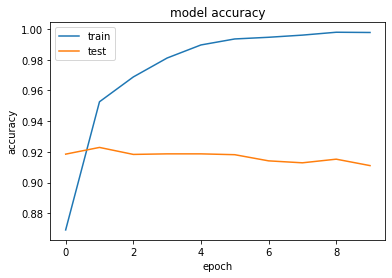

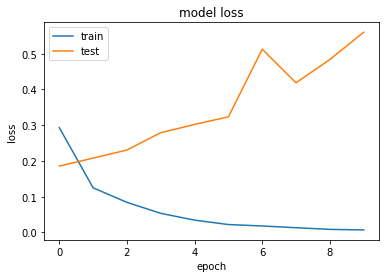

In [100]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [101]:
#Performance Matrix and Accuracy
y_pred = model.predict_classes(X_test)

In [102]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[2874,  233],
       [ 255, 2124]])

In [103]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9110462996718921